<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>
<br />
Кирилл, доброго дня! рад приветствовать тебя в финале) <br />
Вот и он подобрался, поздравляю. Остался последний рывок в этом марафоне)<br>
<br />
Меня зовут Николай. <br />И на этом этапе Вашего движения к новой профессии от меня будут комментарии по написанному коду. <br />Чтобы меньше "мусорить эфир" и чтобы максимально наглядно отделяться от основного кода, есть предложение условиться в некоторых обозначениях:<br /> <br />
<u><b>ТАКОЙ ШРИФТ</b></u> - всегда начало комментария <br />
<font color='green'>такой шрифт</font> - комментарии о том, что всё ОК <br/>
<font color='purple'>такой шрифт</font> - комментарии о том, что всё ОК по результату,<br> однако что есть ещё что-то или в коде или есть способы сделать более короткий или быстрый код <br/>
<font color='red'>такой шрифт</font> - комментарии о том, что есть критичный момент, влияющий на бизнес-результат проекта.<br/>
</font><br /><br />
<font color='green'>Как и всегда в спринтах - ставлю своей целью максимально помочь. Поэтому, все мои комментарии - это только способ передать свой опыт для помощи в твоих достижениях.

Анализируемые данные состоят из состоят из файлов в формате csv, полученных из разных источников:  
**contract** - информация о договоре,  
**personal** - персональные данные клиента,   
**internet** - информация об интернет-услугах,  
**telephone** -  информация об услугах телефонии

# Цель проекта: Научиться прогнозировать отток клиентов в компании - операторе связи.

*Дополнительно: оценить возможный размер скидки/акции для удержания клиента

# Выгрузка данных

In [1]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, classification_report
from catboost import CatBoostClassifier
from sklearn.utils import shuffle

import warnings
warnings.simplefilter(action='ignore')
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

In [8]:
#информация о договоре - https://drive.google.com/file/d/14LbXGog9ekuX0-gBDH6xqZWuUOiFPy6x/view?usp=sharing  
#информация об интернет-услугах - https://drive.google.com/file/d/14GsvEOvU88hZqzS8MzzV5M52jtFlAy7p/view?usp=sharing  
#персональные данные клиента - https://drive.google.com/file/d/1Ps6uEmMmJhCOGIevU_zI0V5uGpUb47QL/view?usp=sharing  
#информация об услугах телефонии. - https://drive.google.com/file/d/1DwXCLK-6VO2DxlbDvRwmnVLZSl6zYQSW/view?usp=sharing

! gdown https://drive.google.com/file/d/14LbXGog9ekuX0-gBDH6xqZWuUOiFPy6x/view?usp=sharing  
! gdown https://drive.google.com/file/d/14GsvEOvU88hZqzS8MzzV5M52jtFlAy7p/view?usp=sharing  
! gdown https://drive.google.com/file/d/1Ps6uEmMmJhCOGIevU_zI0V5uGpUb47QL/view?usp=sharing  
! gdown https://drive.google.com/file/d/1DwXCLK-6VO2DxlbDvRwmnVLZSl6zYQSW/view?usp=sharing

/bin/bash: gdown: command not found
/bin/bash: gdown: command not found
/bin/bash: gdown: command not found
/bin/bash: gdown: command not found


In [3]:
contract = pd.read_csv('/content/contract.csv', parse_dates=['BeginDate'])
personal = pd.read_csv('/content/personal.csv')
internet = pd.read_csv('/content/internet.csv')
phone = pd.read_csv('/content/phone.csv')

FileNotFoundError: [Errno 2] File b'/content/contract.csv' does not exist: b'/content/contract.csv'

In [ ]:
contract = pd.read_csv('/datasets/final_provider/contract.csv', parse_dates=['BeginDate'])
internet = pd.read_csv('/datasets/final_provider/internet.csv')
personal = pd.read_csv('/datasets/final_provider/personal.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [ ]:
contract.columns, \
personal.columns, \
internet.columns, \
phone.columns

Таблицы содержат следующую информацию:  
1. *contract*:  
BeginDate - дата начала пользования услугами,  EndDate - дата окончания пользования услугами,  Type  - тип оплаты, PaperlessBilling -  безналичный расчет,  PaymentMethod - способ оплаты,  MonthlyCharges - ежемесячные траты,  TotalCharges - всего потрачено денег на услуги,  
2. *personal*:  
gender - пол,   SeniorCitizen - наличие пенсионного статуса по возрасту,  Partner - наличие супруга(и),  Dependents - наличие иждивенцев,  
3. *internet*:  
InternetService - подключен ли интернет,  OnlineSecurity - блокировка небезопасных сайтов,  OnlineBackup - облачное хранилище файлов для резервного копирования данных,  DeviceProtection - наличие антивируса,  TechSupport - выделенная линия технической поддержки,  StreamingTV - стриминговое телевидение,  StreamingMovies - каталог фильмов,  
4. *phone*:  MultipleLines - наличие возможности ведения параллельных линий во время звонка.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br> Отлично, данные на базе)

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>

Привет, спасибо за ревью! Делал работу через колаб, смотрю, в джупитере код местами не прогрузился. 

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>есть такое)) Но я смотрел больше суть твоих идей)

In [4]:
# Для удобства объединим все таблицы в один датафрейм
data = pd.merge(contract,personal,on='customerID', how='outer')
data = pd.merge(data,internet,on='customerID', how='outer')
data = pd.merge(data,phone,on='customerID', how='outer')

NameError: name 'contract' is not defined

In [5]:
data.info()

NameError: name 'data' is not defined

In [7]:
data.sample(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
2020,2546-KZAAT,2015-10-01,No,One year,Yes,Mailed check,75.40,3865.45,Male,0,Yes,No,DSL,Yes,Yes,No,No,Yes,Yes,No
4348,6121-VZNQB,2019-12-01,2020-01-01 00:00:00,Month-to-month,Yes,Mailed check,19.10,19.1,Female,0,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5740,8882-TLVRW,2014-05-01,No,Two year,No,Mailed check,39.10,2779.5,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,No,No,NaN
5180,0361-HJRDX,2014-06-01,No,Two year,No,Credit card (automatic),64.35,4539.6,Female,0,No,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,NaN
37,6572-ADKRS,2016-04-01,No,Month-to-month,Yes,Credit card (automatic),74.80,3548.3,Female,0,No,No,Fiber optic,No,No,Yes,No,No,No,No


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ОК, есть контакт)

In [8]:
data.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines'],
      dtype='object')

In [9]:
# Приведём названия столбцов к одному виду
data.columns = ['customer_id', 'begin_date', 'end_date', 'payment_type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines']

In [10]:
data.sort_values(by='begin_date')

,customer_id,begin_date,end_date,payment_type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
4513,8580-QVLOC,2013-10-01,2019-10-01 00:00:00,Two year,No,Credit card (automatic),92.45,6440.25,Female,1,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4610,2889-FPWRM,2013-10-01,2019-10-01 00:00:00,One year,Yes,Bank transfer (automatic),117.80,8684.8,Male,0,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3439,0917-EZOLA,2013-10-01,2019-10-01 00:00:00,Two year,Yes,Bank transfer (automatic),104.15,7689.95,Male,1,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
975,2834-JRTUA,2013-11-01,2019-10-01 00:00:00,Two year,Yes,Electronic check,108.05,7532.15,Male,0,No,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
3040,7317-GGVPB,2013-11-01,2019-10-01 00:00:00,Two year,Yes,Credit card (automatic),108.60,7690.9,Male,0,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,,Male,0,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes


Период анализа данных: с 01.10.2013 по 01.02.2020 года.

In [11]:
data.describe()

,monthly_charges,senior_citizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


In [12]:
data.describe(include='O').T

,count,unique,top,freq
customer_id,7043,7043,9955-QOPOY,1
end_date,7043,5,No,5174
payment_type,7043,3,Month-to-month,3875
paperless_billing,7043,2,Yes,4171
payment_method,7043,4,Electronic check,2365
total_charges,7043,6531,,11
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
internet_service,5517,2,Fiber optic,3096


Явных категориальных признака всего 4: payment_type, payment_method, gender, internet_service. Посмотрим, что они в себя включают.

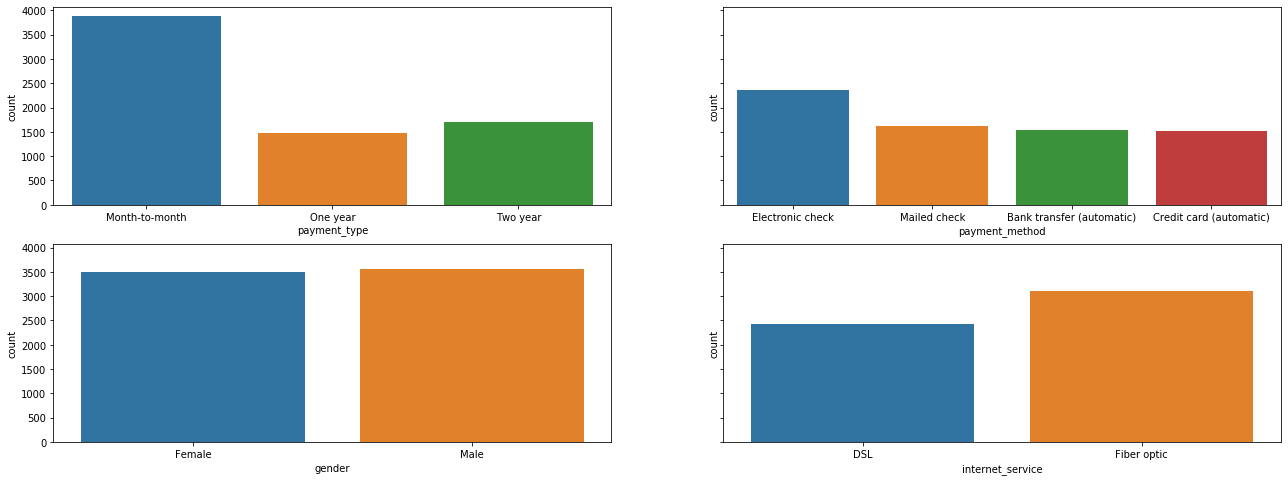

In [13]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize=(22,8), sharey=True)
ax1 = sns.countplot(data['payment_type'], ax=axs[0, 0])
ax2 = sns.countplot(data['payment_method'], ax=axs[0, 1])
#ax2.tick_params(axis='x', rotation=25)
ax3 = sns.countplot(data['gender'], ax=axs[1,0])
ax4 = sns.countplot(data['internet_service'], ax=axs[1,1])
plt.show()

In [14]:
data['end_date'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: end_date, dtype: int64

In [15]:
data['senior_citizen'].value_counts()

0    5901
1    1142
Name: senior_citizen, dtype: int64

Всего в таблице имеется 7043 записи и 20 столбцов. Данные предоставлены за период с 01.11.2013 по 01.02.2020.

Неверные типы данных имеются в столбцах: end_date, total_charges.  
Большая часть признаков имеет булевый тип: подключена услуга или нет.  
В столбцах с услугами имеются пропуски.  
Столбец end_date имеет всего 5 уникальных значений, из них 4 - даты, когда клиенты расторгали договоры - ежемесячно по первым числам с 01.10.2019 по 01.01.2020.  
Также стоит отметить, что данные для целевого признака несбалансированы - только около четверти анализируемых клиентов расторгли договоры.  
Аномалий в категориальных признаках не обнаружено.  
Отсутствует целевой признак - расторгнут договор или нет.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>Хороший аналитический осмотр - чётко и по делу)

# Предобработка данных

## Изменение типов данных, обработка пропусков и дубликатов

In [16]:
# Преобразуем тип данных для столбца total_charges
data['total_charges'] = pd.to_numeric(data['total_charges'], errors='coerce')

In [17]:
data.isna().sum()

customer_id             0
begin_date              0
end_date                0
payment_type            0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges          11
gender                  0
senior_citizen          0
partner                 0
dependents              0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
multiple_lines        682
dtype: int64

В столбцах с дополнительными услугами имеются пропуски, которые образовались после объединения всех таблиц в одну. Т.к. объединяли их по столбцу customer_id, значит пропуски образовались у тех клиентов, у которых не была подключена какая-то услуга, поэтому заполним все пропуски значением No. Пропуски в столбце internet_service заполним значением No internet. Пропуски в столбце total_charges удалим, т.к. их всего 11.

In [18]:
cat_columns = ['paperless_billing', 'partner', 'dependents','online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'multiple_lines']

data[cat_columns] = data[cat_columns].fillna('No')
data['internet_service'].fillna('No internet',inplace=True)
data.dropna(inplace=True)

In [19]:
# Преобразуем категориальные признаки логического типа к нулям и единицам.
data[cat_columns] = data[cat_columns].astype('category')
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)
#data = data.replace(to_replace = ['Yes','No'], value = [1,0])
data.dtypes

customer_id                  object
begin_date           datetime64[ns]
end_date                     object
payment_type                 object
paperless_billing              int8
payment_method               object
monthly_charges             float64
total_charges               float64
gender                       object
senior_citizen                int64
partner                        int8
dependents                     int8
internet_service             object
online_security                int8
online_backup                  int8
device_protection              int8
tech_support                   int8
streaming_tv                   int8
streaming_movies               int8
multiple_lines                 int8
dtype: object

In [20]:
data.duplicated().sum()

0

В данных отсутствуют дубликаты

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>понятно, ок

## Создание дополнительных признаков

In [21]:
# создадим столбец churn, который будет нашим целевым признаком
data['churn'] = np.where(data['end_date'] == 'No', 0, 1)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>ОК

In [22]:
# Создадим столбец с расчетом срока действия договора в месяцах
# data['contract_duration_months'] = data['total_charges'] / data['monthly_charges']
# data['contract_duration_months'] = data['contract_duration_months'].astype('int')

#Заполним значение No в столбце end_date датой, на которую были выгружены данные
data.loc[data['end_date'] == 'No', 'end_date'] = '2020-02-01 00:00:00'
# Преобразуем столбец в формат даты
data['end_date'] = pd.to_datetime(data['end_date'], format='%Y-%m-%d') 
# Создадим столбец с расчетом количества дней действия договоров
data['contract_duration_days'] = data['end_date'] - data['begin_date']
# Оставим в столбец только число дней 
data['contract_duration_days'] = data['contract_duration_days'].dt.days

data['contract_duration_days']

0         31
1       1036
2         61
3       1371
4         61
        ... 
7038     730
7039    2191
7040     337
7041     123
7042    2010
Name: contract_duration_days, Length: 7032, dtype: int64

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>интересная мысль по новому фактору!

# Подготовка данных для построения модели

Для обучения модели нам не понадобятся признаки customer_id, begin_date и end_date, исключим их.

In [23]:
data = data.drop(['customer_id','end_date', 'begin_date'], axis = 1)
cat_data = data.copy() # сделаем копию данных для обучения модели на catboost
data.shape

(7032, 19)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОТЛИЧНО, что удаляешь факторы-даты!!!!! Если у нас тема НЕ временные ряды, то такие факторы лучше не использовать. Они "нагонят" метрики, но бизнес-эффективность модели  - рухнет.

## Обработка категориальных признаков

В результате предобработки осталось 4 категориальных признака.  
Для столбца gender произведём замену значений: Male - 0, Female - 1  
Столбцы payment_type, payment_method, internet_service закодируем при помощи OHE.

In [24]:
data['gender'].replace(to_replace = ['Female','Male'], value = [1,0], inplace = True)

In [25]:
# Используем one hot encoding для оставшихся категориальных столбцов
data_ohe = pd.get_dummies(data=data, columns = ['payment_type', 'payment_method', 'internet_service'] , drop_first = True)
data_ohe.head()

,paperless_billing,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,churn,contract_duration_days,payment_type_One year,payment_type_Two year,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,internet_service_Fiber optic,internet_service_No internet
0,1,29.85,29.85,1,0,1,0,0,1,0,0,0,0,0,0,31,0,0,0,1,0,0,0
1,0,56.95,1889.50,0,0,0,0,1,0,1,0,0,0,0,0,1036,1,0,0,0,1,0,0
2,1,53.85,108.15,0,0,0,0,1,1,0,0,0,0,0,1,61,0,0,0,0,1,0,0
3,0,42.30,1840.75,0,0,0,0,1,0,1,1,0,0,0,0,1371,1,0,0,0,0,0,0
4,1,70.70,151.65,1,0,0,0,0,0,0,0,0,0,0,1,61,0,0,0,1,0,1,0


<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
принято)

Проверим, есть ли в данных признаки, которые сильно коррелируют.

In [26]:
# Проверяем только количественные признаки
corr = data_ohe[['monthly_charges','total_charges', 'contract_duration_days']].corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, 
    fmt='.2f'
)

TypeError: 'float' object cannot be interpreted as an integer

<Figure size 1080x864 with 0 Axes>

Как видно из графика, признака с корреляцией с сильной корреляцией (более 0.9)отсутствуют.

<div style="background: #ffeeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>ОК, работа с мультиколлинеарностью - важна. Но есть важный момент по корреляциям: данная корреляция Спирмена/Пирсона - разрабатывался для количественных шкал. Если данные в бинарной шкале (пол, тип услуги....) - техника не подходит, лучше не опираться на данные выводы.<br>
    
Поэтому выводы можно делать только по количественным данным (в нашем случае - финансы и длительность контракта)

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>

Оставил только корреляцию для количественных признаков. На практике, если создаётся новый признак, являющийся производным уже существующих, то старые признаки убирают из модели? В нашем случае срок действия договора в днях или месяцах достаточно сильно коррелирует с оплатой всего. Пробовал убирать total_charges из модели, но чего метрика понижалась, из-за чего решил оставить срок договора в днях, а не в месяцах.  
  
Погуглил про определение корреляции для качественных признаков, нашёл спопособ через расчет хи-вадрата, но какие-то сложно интерпертируемые значения выходят. В полученной матрице получается, что для многих признаков нулевые гипотезы отвергаются, т.е. признаки коррелируют, но по ощущениям не должно быть сильной зависимости между ними... В общем запутался немного)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>старый или новый убирается - это уже наше решение. Какой мы считаем сильнее влияет на целевую, тот и оставляем. Чисто аналитическое решение. В днях - да, у на с лучше сработает из-за того, что различия между строками (клиентами) сильнее видны (1 и 2 месяца или 30 и 60 дней - градиент разный)).<br>
    
Верно, хи-квадрат надо применять для качественных. По полу - точно нет зависимости. А другие некоторые есть. Но детали однозначно смотерть надо. Вообще тема - для дополнительного серьёзного обучения)

In [ ]:
# Создание матрицы корреляции категориальных признаков при помощи Хи-квадрат.
# import scipy.stats as ss
# from itertools import product
# df_cat = data_ohe[['paperless_billing', 'gender', 'senior_citizen', 'partner', 'dependents', 'online_security',
#        'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
#        'streaming_movies', 'multiple_lines', 'payment_type_One year', 
#        'payment_type_Two year', 'payment_method_Credit card (automatic)','payment_method_Electronic check', 
#        'payment_method_Mailed check','internet_service_Fiber optic', 'internet_service_No internet']]
# result = []
# for i in cat_var_prod:
#   if i[0] != i[1]:
#     result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
#                             df_cat[i[0]], df_cat[i[1]])))[1]))

# chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
# ## Using pivot function to convert the above DataFrame into a crosstab
# cat_corr_table = chi_test_output.pivot(index='var1', columns='var2', values='coeff').round(2)

# Обучение модели

In [27]:
features  = data_ohe.drop(['churn'], axis=1)
target = data_ohe['churn']

In [28]:
# Выделим в качестве тестовой выборки 25% от общей
features_train, features_test, target_train, target_test = train_test_split(features,target,test_size=0.25, random_state=43)
features_train.shape, target_train.shape, features_test.shape, target_test.shape

((5274, 22), (5274,), (1758, 22), (1758,))

## Масштабирование числовых признаков

In [29]:
# Масштабируем признаки при помощи MinMaxScaler
numeric = ['monthly_charges', 'total_charges', 'contract_duration_days']#, 'contract_duration_months']

scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric]= scaler.transform(features_test[numeric])

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
    <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
<font color='green'><br>👍 

In [30]:
features_test[numeric].head()

,monthly_charges,total_charges,contract_duration_days
3940,-1.319739,-0.796796,-0.537222
3346,0.642665,-0.922078,-1.229056
143,0.650994,1.342585,1.291194
4204,0.692641,-0.823357,-1.107517
4386,-0.240250,0.347318,0.925244


## Логистическая регрессия

In [32]:
clf = LogisticRegression(random_state=43,solver = 'liblinear')

param_dict_logistic = {
    "C": np.logspace(0.01, 1, 10),
    "max_iter": [10, 100, 500, 1000]
                      }
    
grid = GridSearchCV(clf, param_grid=param_dict_logistic, cv=5, verbose=1, n_jobs=-1)
grid.fit(features_train, target_train)

grid.best_estimator_, \
grid.best_score_

Fitting 5 folds for each of 40 candidates, totalling 200 fits


(LogisticRegression(C=1.6982436524617444, max_iter=10, random_state=43,
                    solver='liblinear'), 0.8096308353642634)

In [33]:
lr = LogisticRegression(C=1.6982436524617444, max_iter=10, random_state=43,
                    solver='liblinear')
#lr = LogisticRegression(C=4.178810060294222, max_iter=10, random_state=43,solver='liblinear')
lr.fit(features_train, target_train)
prediction = lr.predict(features_test)
accuracy_score(target_test, prediction)

0.7935153583617748

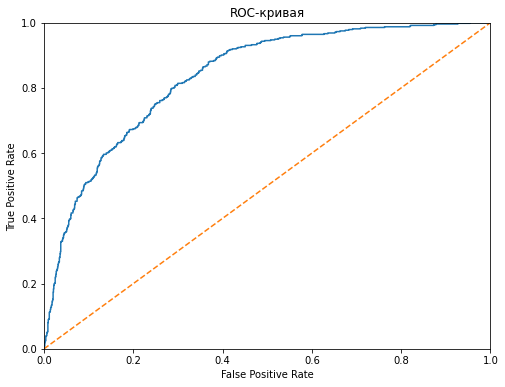

In [34]:
# Построим ROC-кривую для модели
probabilities_test = lr.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

In [35]:
# Посчитаем значение метрики AUC-ROC 
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8354579182468063

In [ ]:
print(classification_report(target_test, prediction))

Анализируя показатели точности и полноты, видим, что логистическая регрессия довольно хорошо определяет клиентов, которые не будут расторгать договоры, но результаты по оттоку средние.

## Cлучайный лес

In [36]:
clf = RandomForestClassifier(random_state=43)

param_dict = {
    "n_estimators": [10,100,1000],
    "max_depth": range(1,20,2),
    "min_samples_split":range(2,10,2),
    "min_samples_leaf":range(1,5)}

grid = GridSearchCV(clf, param_grid=param_dict, cv=5, verbose=1,n_jobs=-1)
grid.fit(features_train, target_train)

grid.best_estimator_, \
grid.best_score_

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


(RandomForestClassifier(max_depth=9, min_samples_split=6, random_state=43),
 0.8248004892218315)

In [37]:
forest = RandomForestClassifier(max_depth=9, min_samples_split=6, random_state=43)
forest.fit(features_train, target_train)
prediction = forest.predict(features_test)
accuracy_score(target_test, prediction)

0.8134243458475541

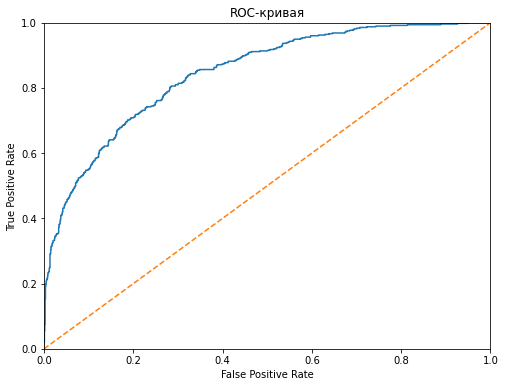

In [38]:
# Построим ROC-кривую для модели
probabilities_test = forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test) 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

In [39]:
# Посчитаем значение метрики AUC-ROC 
auc_roc = roc_auc_score(target_test, probabilities_one_test)
auc_roc

0.8445940721119438

In [ ]:
print(classification_report(target_test, prediction))

Модель случайного леса немного лучше себя показывает при определении оттока, метрика f-1 подросла.

## Catboost

In [40]:
features_cat  = cat_data.drop(['churn'], axis=1)
target_cat = cat_data['churn']

features_train_cat, features_test_cat, target_train_cat, target_test_cat = train_test_split(features_cat,target_cat,test_size=0.25, random_state=43)
features_train_cat.shape, target_train_cat.shape, features_test_cat.shape, target_test_cat.shape

((5274, 18), (5274,), (1758, 18), (1758,))

In [41]:
cat_features = ['payment_type', 'payment_method', 'gender', 'internet_service']

In [42]:
clf = CatBoostClassifier()

param_dict = {
    "iterations": [10, 100, 500, 1000],
    "learning_rate": [0.001, 0.01, 0.1, 1],
    "depth": [2,3,4],
    "l2_leaf_reg": [1,3,5,10] 
}

grid = GridSearchCV(clf, param_grid=param_dict, cv=5)
grid.fit(features_train_cat, target_train_cat, cat_features = cat_features, eval_set=(features_test_cat, target_test_cat), early_stopping_rounds = 10)

Выходные данные были обрезаны до нескольких последних строк (5000).
924:	learn: 0.3555870	test: 0.3908311	best: 0.3908311 (924)	total: 5.2s	remaining: 422ms
925:	learn: 0.3555868	test: 0.3908307	best: 0.3908307 (925)	total: 5.21s	remaining: 416ms
926:	learn: 0.3555506	test: 0.3908420	best: 0.3908307 (925)	total: 5.21s	remaining: 410ms
927:	learn: 0.3555197	test: 0.3908599	best: 0.3908307 (925)	total: 5.22s	remaining: 405ms
928:	learn: 0.3554294	test: 0.3907794	best: 0.3907794 (928)	total: 5.23s	remaining: 400ms
929:	learn: 0.3554199	test: 0.3907903	best: 0.3907794 (928)	total: 5.24s	remaining: 394ms
930:	learn: 0.3554190	test: 0.3907897	best: 0.3907794 (928)	total: 5.24s	remaining: 389ms
931:	learn: 0.3552730	test: 0.3906354	best: 0.3906354 (931)	total: 5.25s	remaining: 383ms
932:	learn: 0.3552575	test: 0.3906539	best: 0.3906354 (931)	total: 5.25s	remaining: 377ms
933:	learn: 0.3552155	test: 0.3906113	best: 0.3906113 (933)	total: 5.26s	remaining: 372ms
934:	learn: 0.3551813	test: 0.390

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fcb96273510>,
             param_grid={'depth': [2, 3, 4], 'iterations': [10, 100, 500, 1000],
                         'l2_leaf_reg': [1, 3, 5, 10],
                         'learning_rate': [0.001, 0.01, 0.1, 1]})

In [43]:
best_params = grid.best_params_
grid.best_score_

0.8543771864348859

In [44]:
cat_boost = CatBoostClassifier(**best_params, verbose=100)
cat_boost.fit(features_train_cat,target_train_cat, cat_features = cat_features, plot=True)
prediction = cat_boost.predict(features_test_cat)
accuracy_score(target_test_cat, prediction)

0:	learn: 0.4902172	total: 4.09ms	remaining: 2.04s
100:	learn: 0.2767492	total: 421ms	remaining: 1.66s
200:	learn: 0.2261854	total: 868ms	remaining: 1.29s
300:	learn: 0.1971860	total: 1.31s	remaining: 864ms
400:	learn: 0.1801637	total: 1.75s	remaining: 432ms
499:	learn: 0.1681449	total: 2.17s	remaining: 0us


0.8794084186575654

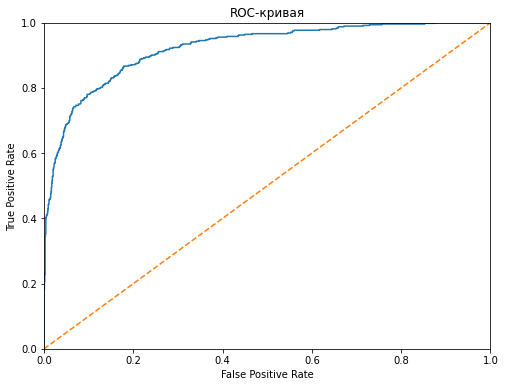

In [45]:
# Построим ROC-кривую для модели
probabilities_test = cat_boost.predict_proba(features_test_cat)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test_cat, probabilities_one_test) 

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

In [46]:
# Посчитаем значение метрики AUC-ROC 
auc_roc = roc_auc_score(target_test_cat, probabilities_one_test)
auc_roc

0.9220810950880628

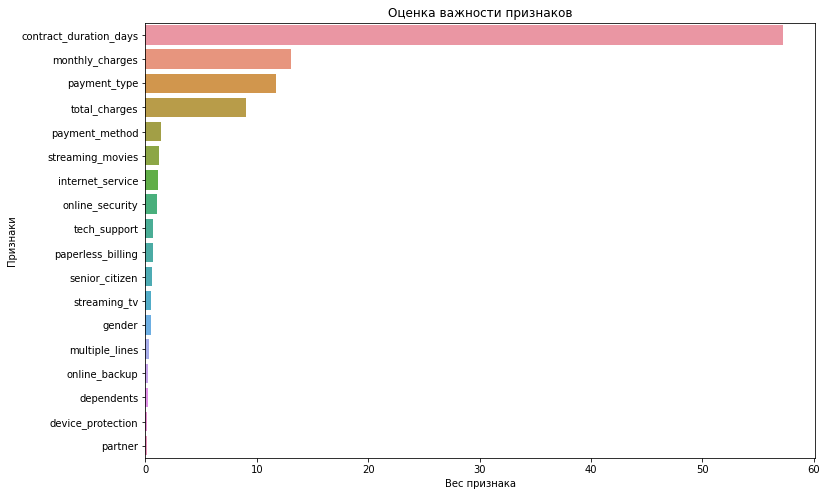

In [47]:
# Функция для построения графика важности признаков
def feature_importance_plot(model, features):
  feature_importance = pd.Series(model.feature_importances_, index = features.columns).sort_values(ascending=False)
  
  plt.figure(figsize=(12,8))
  ax = sns.barplot(x=feature_importance, y = feature_importance.index)
  ax.set(xlabel='Вес признака', ylabel = 'Признаки')
  ax.set_title('Оценка важности признаков')

feature_importance_plot(cat_boost, features_test_cat)

# Для вывода выжности признаков в табличном виде
#fi = pd.DataFrame({'Параметр': features_test_cat.columns, 'Вес_параметра': cat_boost.feature_importances_})
#fi.sort_values(by='Вес_параметра', ascending=False).head(10)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>хорошо, что используешь этот инструмент. На начальном этапе мы можем нагенерить множество разных фич, в том чтисле и лишних. И вот этот инструмент, вкупе с анализом мультиколлинеарности позволяет избавляться от "балласта")

Лучше всего себя показал модель на catboost, значение целевой метрики - roc_auc - на модели с настроенными параметрами - 0.92.  
Как видно из графика важности признаков самую большую важность имеют срок действия договора, месячный платеж и тип оплаты.

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА</u></b>
</font>
<font color='green'><br>
ОК, Кирилл, скажу, что уверенная работа, на мой взгляд)<br>
Обработка данных, размышления над факторами, многогранная модельная работа, конечные результаты - многое удалось как надо<br> 
А что совсем хорошо, так это то, что не стал гнаться за точностью любой ценой, даже ценой наружения бизнес-логики. (это я про даты-признаки, многие их вставляют...)<br>

Прежде, чем идти дальше, напомню из прошлых наших общений основные моменты, которые бы мне хотелось зафиксировать, как важные для момделирования (что-то ты и так хорошо используешь):<br>   
1) F1, Акураси и AUC - отличные метрики, но нужно держать в голове, что это лишь бобщённые характеристики. А в реальной практике бизнесу часто важно знать детали самой ошибки - из каких ошибок/успехов она складывается. И в этом случае очень кстати будут меры полноты и точности. Рассмотри возможность их использования для своих проектов. Только через них можно выйти на финансовые возможности модели. Ведь перед запуском её в бой, будет сравнение стоимости создания и поддержки модели со стомостью "оставить как есть" 
    
2) При анализе факторов влияния (их зависиомть между собой и на целевую) происходит по одному из трёх алгоритмов, исходя из типа шкалы. Могут применять следующие графический и аналитический анализы:<br>
- колличественная-колличественная: аналитически методод - корреляции, графический - скатерплот.<br>
- колличественная-номинальная: аналитически методод - проверка гипотез (стьюдент, маннауитни), графический - боксплот.<br>
- номинальная-номинальная: аналитически методод - Хи-квадрат, графический - круговая диаграмма<br>
Это я к тому разделу, который посвящён анализу данных. Там ты сделал интересные предположения и чтобы их доказать, стои проверить аналитически. Вот как раз те методы проверки гипотез, что выше написал.<br>
    
3) Алгоритм нахождения модели может быть таким:<br>
- изучаем проблематику бизнеса и самой темы (в данном случае отток). Пытаемся понять суть явления.<br>
- генерируем разные факторы влияния - любые.<br>
- дизайнируем (прикидываем модели) какие методы решения есть, чтобы решить проблему.<br>
- Смотрим, какие данные и в какой шкале есть. Что нужно ещё, что применить выбранный метод.<br>
- Оцениваем мультиколлинеарность.<br>
- строим модели и анализируем те фактры, какие сгенерировали ранее.<br>
- Думаем над тем, какие причины (факторы) могут ещё влиять на отток.<br>
- если после нескольких итераций точность "замирает" - значит достигли потолка)<br>
 
4) Проведение анализа важности факторов с помощью команды feature_importances_ (+графический анализ). Отличная вещь намечается: высока я метрика + график рейтинаг факторов по силе влияния на целевой признак). Важнейшая часть любого модельного финала. Если видно, что часть факторов - слабозначимые для модели. Т.е. не значительно влияют на целевую переменную, то их смело можно убирать из модели. Ну и для бизнеса доносить: так мол и так - на эти факторы надо обращать внимание, а эти не влияют на уход клиента.

В общем-то и вопросов у меня и нет)<br>
Возможно, что у тебя остались/появились?

<div class="alert alert-info">
<font size="5"><b>Комментарий студента</b></font>

Спасибо за подробный комментарий! Обычно оговаривается с заказчиком, что важнее точность или полнота, и какие их значения достаточны, или аналитик сам определяет?  
   По поводу пункта 2 можешь посоветовать, что почитать?  
   В моём случае самая значимая фича - срок действия договора - она значительно повышает качество модели, но при этом это параметр, на который бизнес на прямую не может повлиять, и он по сути является скрытым целевым параметром. На сколько корректно его использовать? Если задача заключается в анализе имеющихся услуг и цен и определение, что же можно улучшить, то тогда эта фича не помогает бизнесу. Либо нужно проводить дополнительный анализ по степени влияния других признаков на этот.  
    Я немного дополнил проект по твоим замечаниям и дописал выводы, готов на следующий этап переходить ;)

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
    <font color='green'> <b><u>КОММЕНТАРИЙ РЕВЬЮЕРА 2</u></b>
</font>
<font color='green'><br>
Привет, Кирилл!<br>
Спасибо за отклик)<br>
По разному - иногда оговаривается, иногда надо счтитать и показывать графики.<br>
Тут надо опираться больше будет на финансовые вычисления. Т.е. переводить ошибку модели в затраты/доходы от действий.<br>
Например, у нас есть отток клиента. Наш финансовый отдел посчитал: уход одного клиента стоит нам 100 рублей. СТОимость рекламного канала - 30 рублей на клиента.<br>
Теперь, наша модель: мы прогнозируем отток. и у нас есть два типа ошибок: мы подумаем, что клиент хочет уйти, а на самом деле он никуда не собирался. И - мы подумаем, что клиент никуда не собирается, а он взял и ушёл.<br>
Какую ошибку минимизировать нам выгоднее с позиции экономики? Тут надо считать. Предположим, что по первой ошибке мы не угадываем 20 человек, по второй ошибке мы не угадываем 30 человек. Что это в деньгах? В перврм случае (мы пользовались рекламным каналом, а этого можно было и не делать) - потратили зря 30 рублей * 20 = 600 рублей. Во втором случае: ничего не делали и потеряли 100*30=3000 рублей. По такой логике, можно построить равновесную финансовую кривую, по которой будет понятно где для нас лучший балланс ошибок. Примерно так. Тут, пока может быть не совсем понятно (это нормально. Когда мы такую штуку для банка разрабатывали, то на презентации тоже долго с "раскуривали" ). Просто надо сесть в экселе и по-упражняться в расчётах....А потом, посчитав выгоду работы модели за год, можно сравниваеть её со стоимостью разработки и поддержки модельного решения.<br>
    
По пункту 2: мне в своё время понраилась книга ГЛАНЦ "Медико-биологические исследования" - там пончтно и доходчиво.<br>
    
Верно ты пишешь. Мы с помощью этой фичи улучшили метрику. Но бизнс-составляющая не такая сильная у него. Дело в том, что сам отток сосредоточен в 4-х месяцах. Поэтом у и фича эта сработал так рельефно. При этом, мы портрет отточника не так сильно и видим. Но все твои шаги - верный. В своих задачах так и двигаются обычно.<br>
    
Спасибо за этот труд и за совместную работу на других проектах)<br>
Искренне желаю покорить ещё не один аналитический Эверест)<br>